This jupyter notebook takes as input CSVs that have been created by running https://github.com/ThomHurks/dblp-to-csv with input from here https://dblp.uni-trier.de/xml/ . We cook the CSVs based on our model (see next image)

In [3]:
import os
os.listdir('input/full/')

['output_article.csv',
 'output_article_header.csv',
 'output_author.csv',
 'output_author_authored_by.csv',
 'output_book.csv',
 'output_book_header.csv',
 'output_cite.csv',
 'output_cite_has_citation.csv',
 'output_conference.csv',
 'output_conference_published_in.csv',
 'output_editor.csv',
 'output_editor_edited_by.csv',
 'output_incollection.csv',
 'output_incollection_header.csv',
 'output_inproceedings.csv',
 'output_inproceedings_header.csv',
 'output_journal.csv',
 'output_journal_published_in.csv',
 'output_mastersthesis.csv',
 'output_mastersthesis_header.csv',
 'output_phdthesis.csv',
 'output_phdthesis_header.csv',
 'output_proceedings.csv',
 'output_proceedings.xlsx',
 'output_proceedings_header.csv',
 'output_publisher.csv',
 'output_publisher_published_by.csv',
 'output_school.csv',
 'output_school_submitted_at.csv',
 'output_www.csv',
 'output_www_header.csv']

Above are all the CSVs generated by the converter + output_conference.csv which we created by splitting output_journal.csv in 2

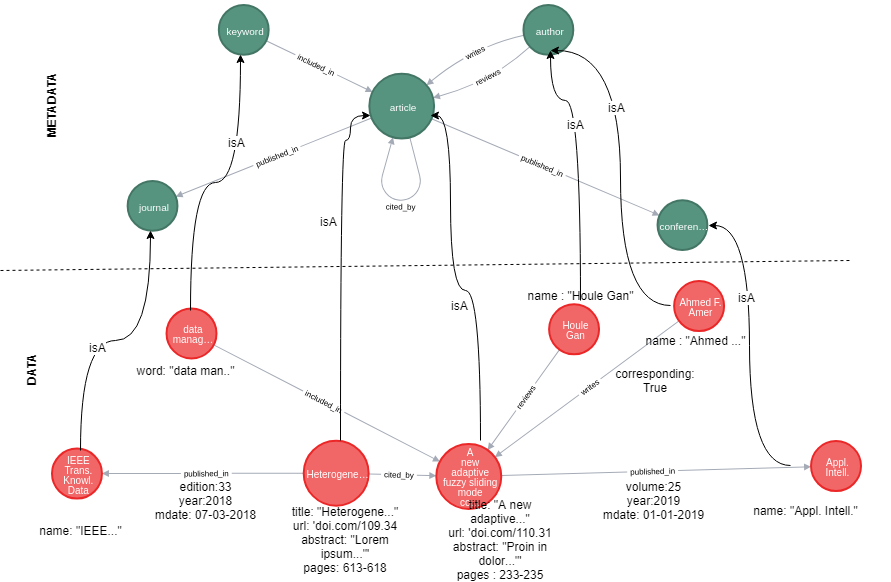

In [7]:
from IPython.display import Image
Image('report_items/graph_simple.png')

In [4]:
import pandas as pd
import gc
from IPython.display import display, HTML

Only a subset of papers have citations or references. We want all of them.

In [5]:
citations = pd.read_csv('input/full/output_cite_has_citation.csv',sep=';')
# IDS of all papers that cite or are cited
all_ref_papers = list(set(list(citations[':START_ID']) + list(citations[':END_ID'])))
print(len(all_ref_papers))

28413


In [6]:
with open('input/full/output_article_header.csv') as f:
    article_header = f.readline().split(';')
articles = pd.read_csv('input/full/output_article.csv', header=0, names=article_header, sep=';')
print(articles.shape)

C:\Users\jp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,5,6,7,8,9,10,11,13,14,18,19,20,21,22,23,24,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1978853, 33)


In total we have 1978853 articles, but they are too many. we will continue with 100.000 randomly sampled, plus all those that cite or are cited

In [84]:
articles_ref = articles[articles['article:ID'].isin(all_ref_papers)]
articles_noref = articles[~articles['article:ID'].isin(all_ref_papers)].sample(n=10**5)
articles_set = pd.concat([articles_ref, articles_noref])
del articles
gc.collect()

1012

In [87]:
display(articles_set.head())
print(articles_set.columns)

,article:ID,author:string[],author-aux:string,author-orcid:string[],booktitle:string,cdate:date,cdrom:string,cite:string[],cite-label:string[],crossref:string,...,publisher:string,publtype:string,sub:string[],sup:string[],title:string,title-bibtex:string,tt:string[],url:string,volume:string,year:int
10883,10884,Fernando Gomez|Viva Wingate,NaN,NaN,NaN,NaN,TKDE1/P0398.pdf,...|...|...|...|...|...|...|conf/icse/Green76|...,NaN,NaN,...,NaN,NaN,NaN,NaN,Automatic Programming for End Users: The TOAD ...,NaN,NaN,db/journals/tkde/tkde1.html#GomezW89,1,1989.0
10890,10891,Li Gong|Xiaolei Qian,NaN,NaN,NaN,NaN,TKDE7/k0839.pdf,...|...|...|...|...|conf/sp/AklD87|journals/ca...,NaN,NaN,...,NaN,NaN,NaN,NaN,Enriching the Expressive Power of Security Lab...,NaN,NaN,db/journals/tkde/tkde7.html#GongQ95,7,1995.0
10892,10893,Chih-Cheng Hsu|Ricky K. Taira|Wesley W. Chu,NaN,NaN,NaN,NaN,TKDE8/k0522.pdf,...|...|...|...|...|...|...|...|...|books/mk/C...,NaN,NaN,...,NaN,NaN,NaN,NaN,A Knowledge-Based Approach for Retrieving Imag...,NaN,NaN,db/journals/tkde/tkde8.html#HsuCT96,8,1996.0
10900,10901,Jang-Jong Fan|Keh-Yih Su,NaN,NaN,NaN,NaN,TKDE5/P0900.pdf,journals/tkde/FanS93,NaN,NaN,...,NaN,NaN,NaN,NaN,"Corrections to ""An Efficient Algorithm for Mat...",NaN,NaN,db/journals/tkde/tkde5.html#FanS93a,5,1993.0
10908,10909,Fa-Chung Fred Chen|Margaret H. Dunham,NaN,NaN,NaN,NaN,NaN,...|...|books/sp/kimrb85/Jarke85|conf/icde/Cha...,NaN,NaN,...,NaN,NaN,NaN,NaN,Common Subexpression Processing in Multiple-Qu...,NaN,NaN,db/journals/tkde/tkde10.html#ChenD98,10,1998.0


Index(['article:ID', 'author:string[]', 'author-aux:string',
       'author-orcid:string[]', 'booktitle:string', 'cdate:date',
       'cdrom:string', 'cite:string[]', 'cite-label:string[]',
       'crossref:string', 'editor:string[]', 'editor-orcid:string',
       'ee:string[]', 'ee-type:string[]', 'i:string[]', 'journal:string',
       'key:string', 'mdate:date', 'month:string', 'note:string[]',
       'note-type:string[]', 'number:string', 'pages:string',
       'publisher:string', 'publtype:string', 'sub:string[]', 'sup:string[]',
       'title:string', 'title-bibtex:string', 'tt:string[]', 'url:string',
       'volume:string', 'year:int'],
      dtype='object')


We will drop the columns that are not interesting or are full of NaN values

In [89]:
# drop nan columns
l = list(range(2,12)) +[13,14,18,19,20, 23,24,25,26,28,29] 
columns_to_drop = list(articles_set.columns[l])
articles_set.drop(columns=columns_to_drop, inplace=True)
display(articles_set.head())

,article:ID,author:string[],ee:string[],journal:string,key:string,mdate:date,number:string,pages:string,title:string,url:string,volume:string,year:int
10883,10884,Fernando Gomez|Viva Wingate,http://doi.ieeecomputersociety.org/10.1109/69....,IEEE Trans. Knowl. Data Eng.,journals/tkde/GomezW89,2017-05-20,3,398-405,Automatic Programming for End Users: The TOAD ...,db/journals/tkde/tkde1.html#GomezW89,1,1989.0
10890,10891,Li Gong|Xiaolei Qian,http://doi.ieeecomputersociety.org/10.1109/69....,IEEE Trans. Knowl. Data Eng.,journals/tkde/GongQ95,2017-05-20,5,839-841,Enriching the Expressive Power of Security Lab...,db/journals/tkde/tkde7.html#GongQ95,7,1995.0
10892,10893,Chih-Cheng Hsu|Ricky K. Taira|Wesley W. Chu,http://doi.ieeecomputersociety.org/10.1109/69....,IEEE Trans. Knowl. Data Eng.,journals/tkde/HsuCT96,2017-05-20,4,522-532,A Knowledge-Based Approach for Retrieving Imag...,db/journals/tkde/tkde8.html#HsuCT96,8,1996.0
10900,10901,Jang-Jong Fan|Keh-Yih Su,NaN,IEEE Trans. Knowl. Data Eng.,journals/tkde/FanS93a,2012-09-16,5,900,"Corrections to ""An Efficient Algorithm for Mat...",db/journals/tkde/tkde5.html#FanS93a,5,1993.0
10908,10909,Fa-Chung Fred Chen|Margaret H. Dunham,http://doi.ieeecomputersociety.org/10.1109/69....,IEEE Trans. Knowl. Data Eng.,journals/tkde/ChenD98,2017-05-20,3,493-499,Common Subexpression Processing in Multiple-Qu...,db/journals/tkde/tkde10.html#ChenD98,10,1998.0


In [44]:
authors = pd.read_csv('input/full/output_author.csv',sep=';')
authors_articles = pd.read_csv('input/full/output_author_authored_by.csv', sep=';')



C:\Users\jp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,5,6,7,8,9,10,11,13,14,18,19,20,21,22,23,24,28,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We want to keep only the authors that have written articles in our selected list

In [95]:
authors_articles_set = authors_articles[authors_articles[':START_ID'].isin(list(articles_set['article:ID']))].copy()
# change direction. Instead of (article)-[authored by]->(author), (author)-[writes]->(article)
authors_articles_set.rename(columns={':START_ID':':END_ID',':END_ID':':START_ID'}, inplace=True)

(292460, 4)
(202683, 2)


In [99]:
authors_set = authors[authors[':ID'].isin(list(authors_articles_set[':START_ID']))].copy()
authors_set.to_csv(path_or_buf='output2/authors.csv',index=False)
print(authors_articles_set.shape)
print(authors_set.shape)

(292460, 5)
(202683, 2)


Similarly we want to keep only the journals for which we have articles published in

In [61]:
journals = pd.read_csv('input/full/output_journal.csv',sep=';')
articles_in_journals = pd.read_csv('input/full/output_journal_published_in.csv',sep=';')
articles_in_journals_set = articles_in_journals[articles_in_journals[':START_ID'].isin(list(articles_set['article:ID']))
                                               &
                                                articles_in_journals[':END_ID'].astype(str).isin(list(journals[':ID']))].copy()
# articles_in_journals_set.shape
articles_in_journals_set['id'] = articles_in_journals_set[':START_ID']
articles_set['id'] = articles_set['article:ID']

articles_in_journals_set_wv = pd.merge(articles_set[['id','volume:string','year:int','mdate:date']],articles_in_journals_set, on='id')
articles_in_journals_set_wv.head()
articles_in_journals_set_wv[[':START_ID','volume:string','year:int','mdate:date',':END_ID']].to_csv(path_or_buf='output/journal_published_in.csv'
                                                                                   ,index=False)

Similarly we want to keep only the conferences for which we have articles published in

In [62]:
conferences = pd.read_csv('input/full/output_conference.csv',sep=';')
articles_in_conferences = pd.read_csv('input/full/output_conference_published_in.csv',sep=';')
articles_in_conferences_set = articles_in_conferences[articles_in_conferences[':START_ID'].isin(list(articles_set['article:ID']))
                                                     &
                                                      articles_in_conferences[':END_ID'].isin(list(conferences[':ID']))].copy()

articles_in_conferences_set['id'] = articles_in_conferences_set[':START_ID']

articles_in_conferences_set_we = pd.merge(articles_set[['id','volume:string','year:int']],articles_in_conferences_set, on='id')
articles_in_conferences_set_we['edition:string'] = articles_in_conferences_set_we['volume:string']
articles_in_conferences_set_we.head()
articles_in_conferences_set_we[[':START_ID','edition:string','year:int','mdate:date', ':END_ID']].to_csv(path_or_buf='output/conference_published_in.csv'
                                                                                   ,index=False)

make the first author of each paper as the corresponding author


In [98]:
authors_articles_set.sort_values(by=':END_ID', inplace=True)
authors_articles_set['TEMP'] = authors_articles_set[':END_ID'].shift(1)
authors_articles_set['corresponding:boolean'] =  (authors_articles_set[':END_ID'] != authors_articles_set['TEMP'])
authors_articles_set[[':START_ID','corresponding:boolean',':END_ID']].to_csv(path_or_buf='output/author_writes_article.csv',index=False)
authors_articles_set.head()

,:END_ID,:START_ID,TEMP,:CORRESPONDING,corresponding:boolean
5087,35,6753705,NaN,True,True
5102,35,6753706,35.0,False,False
3086,93,6753691,35.0,True,True
18483,121,6753866,93.0,False,True
26467,175,6753959,121.0,True,True


In [100]:
display(articles_set.columns)

Index(['article:ID', 'author:string[]', 'ee:string[]', 'journal:string',
       'key:string', 'mdate:date', 'number:string', 'pages:string',
       'title:string', 'url:string', 'volume:string', 'year:int'],
      dtype='object')

add "lorem ipsum..." abstracts

In [102]:
import lorem

abstracts = []
for i in range(articles_set.shape[0]):
    abstracts.append(lorem.paragraph())
articles_set['abstract:string'] = abstracts
articles_set[['article:ID','pages:string', 'title:string', 'url:string','abstract:string']
                    ].to_csv(path_or_buf='output2/articles.csv',index=False)


In [108]:
citations.to_csv(path_or_buf='output2/article_has_citation.csv',index=False)

Synthetically create reviews

In [115]:
from collections import defaultdict
import pandas as pd

# first we have to find the papers of each author.
art2auth = defaultdict(list)
for idx,row in authors_articles_set.iterrows():
    art2auth[row[':END_ID']].append(row[':START_ID'])

Here we create the reviews directly for A.3 and A.2

In [ ]:
import random
import csv
all_papers = list(articles_set['article:ID'])
all_authors = list(authors_set[':ID'])

f1 = open('output2/author_reviews.csv', 'w', newline='')
f2 = open('output2/author_reviews_extended.csv', 'w', newline='')
with open('output2/author_reviews.csv', 'w', newline='') as writeFile:
    writer1 = csv.writer(f1)
    writer2 = csv.writer(f2)
    writer1.writerow([':START_ID',':END_ID'])
    writer2.writerow([':START_ID','review:string','accepted:boolean',':END_ID'])
    for (i,paper) in enumerate(all_papers):
        if i % 1000 == 0:
            reviewers = random.sample(all_authors,1000)
#             print(i)
        # exclude authors for being selected as reviewers of a paper
        revs = set(reviewers) - set(art2auth[paper])
        # Assumption: 3 reviewers per paper - all accept it
        revs = random.sample(revs,3)
        for r in revs:
            writer1.writerow([r,paper])
            writer2.writerow([r,lorem.sentence(),True,paper])


Database keywords plus keywords taken from https://www.informs.org/Explore/History-of-O.R.-Excellence/Documents/ACI-Bibliographic-Database/List-of-Keywords-Used 

In [125]:
db_keywords = ['data management', 'indexing', 'data modeling', 'big data', 'data processing'
               , 'data storage', 'data querying']

more_keywords = []
with open('input/keywords.txt') as f:
    text = f.read()
more_keywords = list(set(text.split('\n\n')))

In [128]:
more_keywords
kw_ids = {}
i = 99999999
with open('output2/keywords.csv', 'w', newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerow([':ID','word:string'])
    for kw in db_keywords+more_keywords:
        kw_ids[kw] = i
        writer.writerow([i,kw])
        i+=1
with open('output/article_keywords.csv', 'w', newline='') as writeFile:
    writer = csv.writer(writeFile)
    # to make sure we can test lab questions, we will make the subset of the papers that cite/are cited to 
    # belong to the database community
    writer.writerow([':START_ID',':END_ID'])
    for paper in all_ref_papers:
        db_kw_num = random.randint(1,4)
        more_kw_num = random.randint(1,4)
        kws = random.sample(db_keywords,db_kw_num) + random.sample(more_keywords, more_kw_num)
        for kw in kws:
            writer.writerow([paper,kw_ids[kw]])
    for paper in (set(all_papers) - set(all_ref_papers)):
        db_kw_num = random.randint(0,1)
        more_kw_num = random.randint(0,3)
        kws = random.sample(db_keywords,db_kw_num) + random.sample(more_keywords, more_kw_num)
        for kw in kws:
            writer.writerow([paper,kw_ids[kw]])

Create some citations, because the ones that were already present are not enough

In [ ]:
import random
import csv
all_articles = list(articles['article:ID'])

journals = pd.read_csv('output2/journal_published_in.csv')
conferences = pd.read_csv('output2/conference_published_in.csv')
papers_year = pd.concat([journals[[':START_ID','year:int']],conferences[[':START_ID','year:int']]])
with open('output2/citations.csv', 'w', newline='') as writeFile:

    writer = csv.writer(writeFile)
    # :START_ID = citee, :END_ID = citer
    writer.writerow([':START_ID',':END_ID'])
    citees = all_articles[:10000]
    citers = all_articles[10001:]
    for a in citees:
        n = random.randint(1,100)
        citer_sample = random.sample(citers,n)
        for c in citer_sample:
            citer = papers_year[papers_year[':START_ID']==c]
            citee = papers_year[papers_year[':START_ID']==a]
            citer_y = citer['year:int']
            citee_y = citee['year:int']
            if citer_y.size==1 and citee_y.size==1 and citer_y.item()>=citee_y.item():
                writer.writerow([a,c])
        

Add more citations for 2018 so that impact_factor for 2018 has multiple results

In [ ]:
articles = pd.read_csv('output2/articles.csv')
journals = pd.read_csv('output2/journal_published_in.csv')
journals1 = pd.concat([journals[journals['year:int']==2016],journals[journals['year:int']==2017]])
papers_to_cite = articles[articles['article:ID'].isin(list(journals1[':START_ID']))].copy()
papers_to_cite = papers_to_cite['article:ID']

conferences = pd.read_csv('output2/conference_published_in.csv')
conferences = conferences[conferences['year:int']==2018]
journals2 = journals[journals['year:int']==2018]
totalPapers = pd.concat([conferences,journals2])
papers_that_cite = articles[articles['article:ID'].isin(list(totalPapers[':START_ID']))].copy()
papers_that_cite = papers_that_cite['article:ID']

with open('output2/citations.csv', 'a') as writeFile:
    writer = csv.writer(writeFile)
    for a in papers_to_cite:
        n = random.randint(1,20)
        citer_sample = random.sample(papers_that_cite,n)
        for c in citer_sample:
            writer.writerow([a,c])

Generate csv file for entities. Information on countries was taken from: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

In [49]:
import pandas as pd
import random
from lorem.text import TextLorem

universities = pd.DataFrame()
types = ['university','company']
countries = pd.read_csv('countries.csv')
country_list = list(countries['name'])
lorem = TextLorem(srange=(3,5))
for i in range(5000):
    name = lorem.sentence()
    c = random.randint(0,len(country_list)-1)
    aux = pd.DataFrame({':ID':[i],'type:string':[types[0]],'name:string':[name],'country:string':[country_list[c]]})
    universities = universities.append(aux)

companies = pd.DataFrame()
for i in range(5000):
    name = lorem.sentence()
    c = random.randint(0,len(country_list)-1)
    aux = pd.DataFrame({':ID':[i],'type:string':[types[1]],'name:string':[name],'country:string':[country_list[c]]})
    companies = companies.append(aux)
    
universities.to_csv('output2/universities.csv')
companies.to_csv('output2/companies.csv')

affiliated_with = pd.DataFrame()
authors = pd.read_csv('output2/authors.csv')
authors_comp = authors[:len(authors)//2]
authors_list = list(authors_comp[':ID'])
company_list =list(companies[':ID'])
for a in authors_list:
    n = random.randint(0,len(company_list)-1)
    aux = pd.DataFrame({':START_ID':[a],':END_ID':[company_list[n]]})
    affiliated_with = affiliated_with.append(aux)

affiliated_with[[':START_ID',':END_ID']].to_csv('output2/affiliated_with_company.csv')
                      
authors_uni = authors[(len(authors)//2)+1:]
authors_list = list(authors_uni[':ID'])
affiliated_with2 = pd.DataFrame()
university_list =list(universities[':ID'])
for a in authors_list:
    n = random.randint(0,len(university_list)-1)
    aux = pd.DataFrame({':START_ID':[a],':END_ID':[university_list[n]]})
    affiliated_with2 = affiliated_with2.append(aux)

affiliated_with2[[':START_ID',':END_ID']].to_csv('output2/affiliated_with_university.csv')